In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('pca.csv')

In [5]:
df.drop('Unnamed: 0', axis  = 1, inplace = True)

In [21]:
df.shape

(390, 14)

In [15]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.02,1.68,2.21,16.0,96,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035,1
1,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547,1
2,12.16,1.61,2.31,22.8,90,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495,2
3,12.37,1.63,2.30,24.5,88,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342,2
4,13.05,1.73,2.04,12.4,92,2.72,3.27,0.17,2.91,7.20,1.12,2.91,1150,1


In [7]:
df.isnull().sum().sum()

0

In [35]:
X = df.drop('Customer_Segment', axis = 1)

In [36]:
y = df['Customer_Segment']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [39]:
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(292, 13)
(98, 13)
(292,)
(98,)


In [40]:
# Clean

In [41]:
# Before we pass in the dataset with all numerical values we need to scale them,
# Let's import standard scaler

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

C:\Users\shhiv\AppData\Local\conda\conda\envs\tensorflow_env\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\shhiv\AppData\Local\conda\conda\envs\tensorflow_env\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\shhiv\AppData\Local\conda\conda\envs\tensorflow_env\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\shhiv\AppData\Local\conda\conda\envs\tensorflow_env\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **f

In [43]:
# Invoking the PCA from the decomposition class of the Sklearn package

In [44]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA(n_components= None)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [46]:
pd.DataFrame(pca.explained_variance_ratio_)

,0
0,0.362761
1,0.163051
2,0.124526
3,0.087060
4,0.062875
5,0.054605
6,0.042570
7,0.027602
8,0.025708
9,0.019155


In [47]:
# Note now with none components we have 12 input components but these are not the features but they are
# the varicance explained by each PC
# Thus, let's see what's the optimal number of variance explainablity and the number of components
# Pure MATH add the variances to see how much variablity is explained in total

In [48]:
# Here if you see the first 4 variables are able to explain 70% of the variablity in the dataset
# So now let's consider PC1, PC2, PC3, PC4 for the analysis

In [49]:
pca = PCA(n_components= 5)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [50]:
pca.explained_variance_ratio_

array([0.36276114, 0.16305078, 0.12452575, 0.08705989, 0.06287465])

In [51]:
# Now see them in action

In [52]:
from sklearn.svm import SVC 
svm_model =  SVC()
svm_model.fit(X_train, y_train)

C:\Users\shhiv\AppData\Local\conda\conda\envs\tensorflow_env\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [53]:
predictions = svm_model.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(predictions,y_test)
print(cm)
print(classification_report(predictions, y_test))
print(accuracy_score(predictions, y_test), "is the accuracy on the svm_model")

[[43  2]
 [ 6 47]]
              precision    recall  f1-score   support

           1       0.88      0.96      0.91        45
           2       0.96      0.89      0.92        53

   micro avg       0.92      0.92      0.92        98
   macro avg       0.92      0.92      0.92        98
weighted avg       0.92      0.92      0.92        98

0.9183673469387755 is the accuracy on the svm_model


In [55]:
# Let's compare our model accuracy with the plain old full svm model with all the varibales

In [56]:
from sklearn.svm import SVC
svm_clf = SVC()

In [57]:
new_X_train, new_X_test, y_train, y_test = train_test_split(X,y)
new_X_train = sc.fit_transform(new_X_train)
new_X_test = sc.fit_transform(new_X_test)
svm_clf.fit(new_X_train, y_train)

C:\Users\shhiv\AppData\Local\conda\conda\envs\tensorflow_env\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\shhiv\AppData\Local\conda\conda\envs\tensorflow_env\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\shhiv\AppData\Local\conda\conda\envs\tensorflow_env\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\shhiv\AppData\Local\conda\conda\envs\tensorflow_env\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **f

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [58]:
base_predictions = svm_clf.predict(new_X_test)

In [59]:
cm = confusion_matrix(base_predictions,y_test)
print(cm)
print(classification_report(base_predictions, y_test))
print(accuracy_score(base_predictions, y_test), "is the accuracy on the svm_model")

[[37  0]
 [ 0 61]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        61

   micro avg       1.00      1.00      1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98

1.0 is the accuracy on the svm_model


In [33]:
# Since this is toy dataset the accuray 1 is happening but in real time where accuracy and precision
# raises by e-3 and e-4 magnitudes
# PCA comes greatly in handy

In [136]:
# The intutuion behind PCA is it maps all the correlation between the varibales and comprises high 
# correlations into the PCs 
# The resultant PCs will not be correlated

In [139]:
X_train = pd.DataFrame(X_train)

In [63]:
X_train = pd.DataFrame(X_train)

In [64]:
Cormat = X_train.corr()

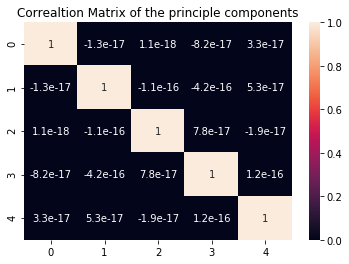

In [65]:
import seaborn as sns
plt.title("Correaltion Matrix of the principle components")
sns.heatmap(Cormat, annot = True)
plt.show()